In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## National Survey of Family Growth (NSFG) | Encuesta Nacional de Crecimiento Familiar

In [5]:
nsfg = pd.read_hdf('../../../nsfg.hdf5', 'nsfg')

In [6]:
# Observamos las primeras observaciones relativas a cada embarazo que forma parte de la muestra
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [7]:
print("El dataset contiene {} filas y {} columnas".format(nsfg.shape[0],nsfg.shape[1]))
print("Variables:",nsfg.columns)

El dataset contiene 9358 filas y 10 columnas
Variables: Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')


In [8]:
nsfg.describe()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
count,9358.000000,9358.000000,6485.000000,6391.000000,9358.000000,6485.000000,9358.000000,9109.000000,6485.000000,9358.000000
mean,65502.392605,1.773990,8.055204,7.213895,29.896345,1.018042,2446.330199,2494.934570,28.992136,10759.200147
std,2953.471315,1.348648,11.178893,8.254885,13.685389,0.160433,579.392363,578.099231,10.367124,11400.179222
min,60418.000000,1.000000,0.000000,0.000000,0.000000,1.000000,750.000000,825.000000,5.000000,1859.105000
25%,62875.750000,1.000000,6.000000,3.000000,14.000000,1.000000,1983.000000,2041.000000,23.000000,4340.053407
50%,65499.000000,1.000000,7.000000,6.000000,38.000000,1.000000,2366.000000,2416.000000,27.000000,7062.994158
75%,68111.000000,2.000000,8.000000,11.000000,39.000000,1.000000,2850.000000,2900.000000,33.000000,12629.322982
max,70619.000000,6.000000,99.000000,99.000000,48.000000,8.000000,4350.000000,4350.000000,99.000000,75399.410000


### Variable `birthwgt_lb1` y `birthwgt_oz1`representan las libras y onzas del bebé 

In [9]:
# almacenaremos en cada variable los datos contenidos en las variables
pounds = nsfg['birthwgt_lb1']
print(pounds.value_counts().sort_index())

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64


In [10]:
# Reemplazaremos aquellos valores que hacen que nuestra media se ve afectada al tratarse de valores atípicos
pounds = pounds.replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1']
ounces.replace([98, 99], np.nan, inplace=True)

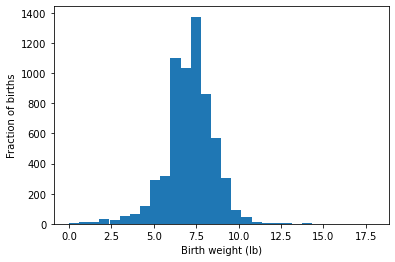

In [11]:
# Creamos una variable que contenga el peso del bebe
birth_weight = pounds + ounces / 16.0
# Graficaremos un histograma
plt.hist(birth_weight.dropna(), bins=30) #psamos dropna para que devuelva una serie que contiene solo valores válidos 
# bins= dividira en 30 intervalos los pesos
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()
# A simple vista pareciera que hay más bebés livianos de peso que pesados, y esto es debido a que en la distribución 
# existen bebés que nacieron de forma prematura

Primera Interrogante: 
 - Peso promedio al nacer de los bebes en Estados Unidos

### Variable `nbrnaliv`: registra el numero de bebés que nacen con vida al final del embarazo

In [12]:
nsfg.nbrnaliv.value_counts() 
# Podemos observar que tenemos un valor que corresponde a la observacion '8', es decir, no responden la pregunta

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [13]:
# Reemplazaremos la observación por "NAN"
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)
nsfg.nbrnaliv.value_counts() 

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [14]:
# Observamos las etiquetas que conforman la variable
nsfg.nbrnaliv.unique()

array([ 1., nan,  2.,  3.])

Variable `agecon` representa la edad de concepción y `agepreg` representa la edad al final del embarazo.

In [15]:
# Observamos el tipo
nsfg[['agecon', 'agepreg']].dtypes

agecon       int64
agepreg    float64
dtype: object

In [16]:
# Ambas variables como observaremos a continuación están registradas como enteros con dos decimales implícitos
print(nsfg.agecon.unique())
print(nsfg.agepreg.unique())

[2000 2291 3241 3650 2191 3391 2366 2866 2133 2333 2600 1858 1991 2208
 2491 2766 2858 2983 3125 3250 2666 2225 2166 2575 2725 1966 2658 1633
 2958 3933 3975 1558 1691 2075 2625 2950 1708 2183 1583 1466 2266 2700
 3141 2008 2450 3016 3100 2733 1750 1900 2041 2408 2675 3583 1775 2091
 3300 3558 1875 2150 2500 2608 3475 2633 3375 2683 1933 2516 1525 3283
 1783 1925 2825 2108 2808 3025 2175 2441 2591 3366 1825 1883 2391 2216
 2383 3208 2350 3350 3383 3550 2933 3066 3116 3575 3750 3991 3091 3408
 2891 2250 2433 2583 1491 1675 1816 2241 2650 3108 2691 2283 2541 2800
 2908 3766 1741 2275 3225 3541 2050 2025 1433 2358 3000 3458 3633 2116
 1666 2416 3658 3708 4016 1550 3216 1758 1850 2125 2641 3433 3400 1808
 2558 2533 2783 1358 1650 2100 2466 2791 3050 2141 1383 1800 2016 3008
 3900 1641 1866 2233 2750 2875 2550 1700 1950 1841 2425 2375 2975 2775
 2033 1716 1983 3291 3775 3333 3616 2400 2833 3341 3083 1941 2200 3258
 3158 3266 3725 3183 1733 2741 1450 1658 2458 3441 1916 2325 1891 3566
 2066 

In [17]:
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Computamos la diferencia
preg_length = agepreg - agecon

# Observamos el resumen de estadísticos
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64
